# 🌍 Climate Change Data Analysis — Submit Ready


This notebook is written in **simple language**.  
It cleans the data, explores trends, and saves 


## 1) Setup

In [5]:
# Imports and folders
import os, pandas as pd, numpy as np, matplotlib.pyplot as plt

CSV_PATH = "climate_nasa.csv"
FIG_DIR = r"/mnt/data/outputs_climate_submit/figures"
DATA_DIR = r"/mnt/data/outputs_climate_submit/data"

os.makedirs(FIG_DIR, exist_ok=True)
os.makedirs(DATA_DIR, exist_ok=True)

def savefig(path):
    # Simple helper to save charts cleanly
    plt.tight_layout()
    plt.savefig(path, dpi=150, bbox_inches="tight")
    print("[Saved]", path)


## 2) Load the dataset

In [6]:
# We load the CSV safely. If UTF‑8 fails, we try a few other encodings.
def load_csv(path):
    for enc in [None, "utf-8", "latin1", "ISO-8859-1", "cp1252"]:
        try:
            return pd.read_csv(path) if enc in (None, "utf-8") else pd.read_csv(path, encoding=enc)
        except Exception:
            continue
    raise RuntimeError("Could not read CSV with common encodings.")

df = load_csv(CSV_PATH)
print("Columns:", list(df.columns))
display(df.head())
print("\nInfo:")
print(df.info())


Columns: ['date', 'likesCount', 'profileName', 'commentsCount', 'text']


,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."



Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB
None


## 3) Clean the data 

In [7]:
# 1) Make column names neat
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]

# 2) Find a date/year column (if present)
date_candidates = [c for c in df.columns if any(k in c for k in ["date","year","time","dt"])]
date_col = date_candidates[0] if date_candidates else None

# 3) Clean text columns safely
for col in df.select_dtypes(include=["object"]).columns:
    df[col] = df[col].astype("string").fillna("").str.strip()

# 4) Parse the date/year column carefully (also remove timezone)
if date_col:
    try:
        df[date_col] = pd.to_datetime(df[date_col], errors="coerce")
    except Exception:
        pass
    if pd.api.types.is_datetime64_any_dtype(df[date_col]):
        try:
            df[date_col] = df[date_col].dt.tz_convert(None)
        except Exception:
            try:
                df[date_col] = df[date_col].dt.tz_localize(None)
            except Exception:
                pass
    elif df[date_col].dtype == "string":
        df[date_col] = pd.to_numeric(df[date_col], errors="coerce")

# 5) Convert number-like strings to real numbers
for col in df.columns:
    if col == date_col:
        continue
    if df[col].dtype == "string":
        df[col] = pd.to_numeric(df[col].str.replace(",",""), errors="ignore")

# 6) Remove exact duplicates
before = len(df)
df = df.drop_duplicates()
print("Removed duplicates:", before - len(df))

# Save the cleaned file
clean_path = os.path.join(DATA_DIR, "climate_cleaned.csv")
df.to_csv(clean_path, index=False)
print("[Saved cleaned data]", clean_path)

display(df.head())


Removed duplicates: 0
[Saved cleaned data] /mnt/data/outputs_climate_submit/data\climate_cleaned.csv


C:\Users\vaibh\AppData\Local\Temp\ipykernel_17984\85933978.py:34: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col].str.replace(",",""), errors="ignore")


,date,likescount,profilename,commentscount,text
0,2022-09-07 17:12:32,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08 14:51:13,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07 17:19:41,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08 00:51:30,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07 19:06:20,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,Yes and carbon dioxide does not harm the Earth...


## 4) Quick summary

In [8]:
numeric_cols = [c for c in df.columns if c != (date_col if 'date_col' in locals() else None) and pd.api.types.is_numeric_dtype(df[c])]
print("Numeric columns found:", numeric_cols)
print("Total rows:", len(df))

Numeric columns found: ['likescount', 'commentscount']
Total rows: 522


## 5) Yearly trends 


In [9]:
year_series = None
if 'date_col' in locals() and date_col is not None:
    if pd.api.types.is_datetime64_any_dtype(df[date_col]):
        year_series = df[date_col].dt.year
    else:
        year_series = pd.to_numeric(df[date_col], errors="coerce")

yearly = None
if year_series is not None:
    tmp = df.copy()
    tmp["_year_"] = year_series
    yearly = tmp.groupby("_year_")[numeric_cols].mean(numeric_only=True).sort_index()
    display(yearly.head())

if yearly is not None and not yearly.empty:
    yearly.to_csv(os.path.join(DATA_DIR, "yearly_means.csv"))
    print("[Saved]", os.path.join(DATA_DIR, "yearly_means.csv"))


,likescount,commentscount
_year_,,
2020,2.531250,7.280488
2021,7.286885,9.290323
2022,5.104478,7.377358
2023,4.584906,11.872340


[Saved] /mnt/data/outputs_climate_submit/data\yearly_means.csv


## 6) Charts

[Saved] /mnt/data/outputs_climate_submit/figures\likescount_over_years.png


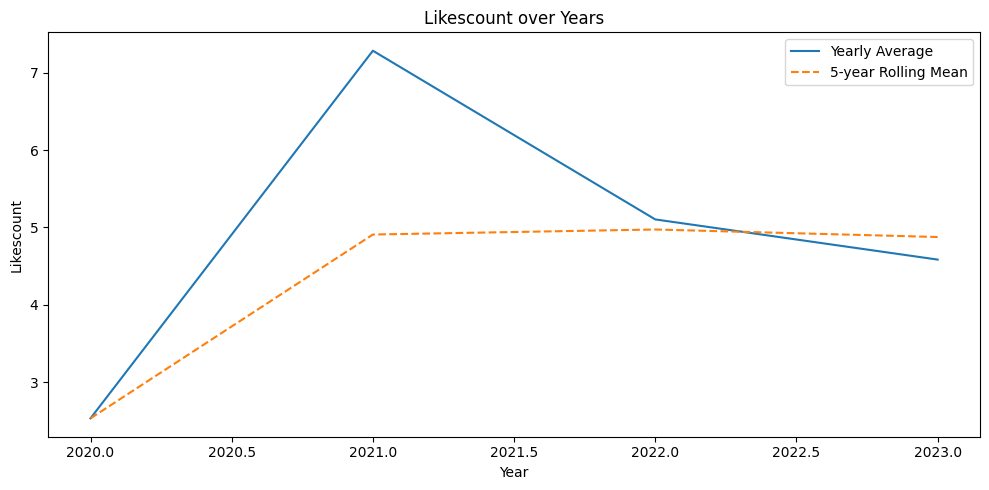

[Saved] /mnt/data/outputs_climate_submit/figures\commentscount_over_years.png


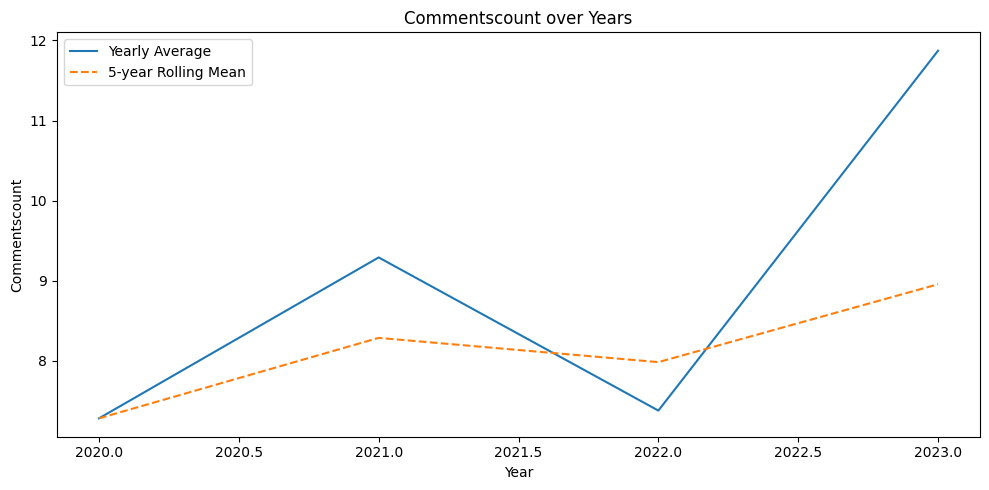

In [10]:
# One simple line chart per metric
if yearly is not None and not yearly.empty:
    for col in yearly.columns:
        plt.figure(figsize=(10,5))
        plt.plot(yearly.index, yearly[col], label="Yearly Average")
        plt.plot(yearly.index, yearly[col].rolling(window=5, min_periods=1).mean(), linestyle="--", label="5-year Rolling Mean")
        plt.title(f"{col.replace('_',' ').title()} over Years")
        plt.xlabel("Year"); plt.ylabel(col.replace('_',' ').title())
        plt.legend()
        savefig(os.path.join(FIG_DIR, f"{col}_over_years.png"))
        plt.show()
else:
    print("No time column detected — skipping yearly plots.")


## 7) Correlation between metrics

,likescount,commentscount
likescount,1.000000,0.279291
commentscount,0.279291,1.000000


[Saved] /mnt/data/outputs_climate_submit/figures\correlation_yearly.png


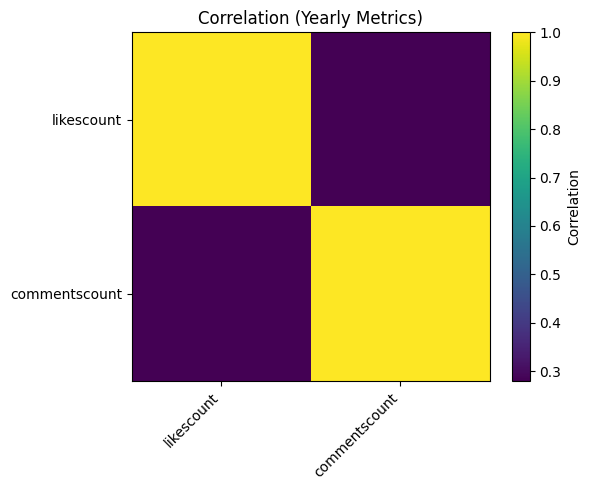

In [11]:
if yearly is not None and not yearly.empty and len(yearly.columns) >= 2:
    corr = yearly.corr()
    display(corr)
    corr.to_csv(os.path.join(DATA_DIR, "correlation_yearly.csv"))
    plt.figure(figsize=(6,5))
    plt.imshow(corr.values, aspect='auto')
    plt.colorbar(label="Correlation")
    plt.xticks(ticks=range(len(corr.columns)), labels=corr.columns, rotation=45, ha="right")
    plt.yticks(ticks=range(len(corr.index)), labels=corr.index)
    plt.title("Correlation (Yearly Metrics)")
    savefig(os.path.join(FIG_DIR, "correlation_yearly.png"))
    plt.show()
else:
    print("Not enough numeric metrics for correlation or no yearly table available.")


# 📝 Insights:-

Metrics analyzed: Likescount, Commentscount.

Likescount increased from 2020 (2.53) to 2023 (4.58).

Commentscount increased from 2020 (7.28) to 2023 (11.87).

Strongest yearly correlation observed between likescount and commentscount (corr ≈ 0.28).
